# Regresión Logística

\begin{align*}
\Large
p_i=\frac{1}{1+e^{-f(x)}}
\end{align*}

In [1]:
import numpy as np
import pandas as pd

In [2]:
candidatos=list(range(1,101))
len(candidatos)

100

In [3]:
np.random.seed(1)
exp=np.random.randint(0,15,100)
len(exp)

100

In [4]:
np.random.seed(2)
actual= [np.random.choice(["Si", "No"]) for n in range(100)]
len(actual)

100

In [5]:
np.random.seed(3)
cargo=[]
for i in range(100):
    if exp[i]!=0 and actual[i]=="Si":
        cargo.append(np.random.choice(["Operativo", "Administrativo", "Gerencial", "Directivo"]))
    elif exp[i]==0 and actual[i]=="Si":
        cargo.append("Becario")
    else:
        cargo.append("Desempleado")
len(cargo)

100

In [6]:
np.random.seed(4)
edad= np.round(np.random.normal(28,4,100),0)
len(edad)

100

In [7]:
min(edad), max(edad)

(18.0, 38.0)

In [8]:
np.random.seed(5)
promedio=np.random.normal(7.5,0.9,100)
len(promedio)

100

In [9]:
df=pd.DataFrame({"Experiencia":exp,
                 "Trabaja":actual,
                 "Cargo":cargo,
                 "Edad":edad,
                 "Promedio":promedio}, 
                index=candidatos)
df.head()

,Experiencia,Trabaja,Cargo,Edad,Promedio
1,5,Si,Gerencial,28.0,7.897105
2,11,No,Desempleado,30.0,7.202217
3,12,No,Desempleado,24.0,9.687694
4,8,Si,Operativo,31.0,7.273117
5,9,Si,Administrativo,26.0,7.598649


In [10]:
np.random.seed(5)
df["Tiempo_ultimo"]=df.Experiencia.apply(lambda x:round(x*np.random.rand(),1))
df.head()

,Experiencia,Trabaja,Cargo,Edad,Promedio,Tiempo_ultimo
1,5,Si,Gerencial,28.0,7.897105,1.1
2,11,No,Desempleado,30.0,7.202217,9.6
3,12,No,Desempleado,24.0,9.687694,2.5
4,8,Si,Operativo,31.0,7.273117,7.3
5,9,Si,Administrativo,26.0,7.598649,4.4


In [11]:
df[df.Experiencia==0]

,Experiencia,Trabaja,Cargo,Edad,Promedio,Tiempo_ultimo
8,0,No,Desempleado,30.0,6.967527,0.0
9,0,Si,Becario,29.0,7.668843,0.0
37,0,No,Desempleado,36.0,7.677894,0.0
47,0,No,Desempleado,27.0,8.525409,0.0
72,0,Si,Becario,29.0,8.884881,0.0
77,0,No,Desempleado,24.0,8.285389,0.0
100,0,Si,Becario,29.0,7.950439,0.0


In [12]:
def contrato(exp,trabaja,cargo,edad,promedio,tiempo):
    if exp==0 and edad>=30:
        return False
    elif exp==0 and promedio<=8:
        return False
    elif trabaja=="No" and tiempo<=1:
        return False
    elif exp>=5 and promedio>=8:
        return True
    elif promedio>=9 and cargo=="Gerencial":
        return True
    elif edad>=30 and (cargo =="Gerencial" or cargo =="Administrativo"):
        return True
    else:
        return False

In [13]:
contrato(df.iloc[0][0],df.iloc[0][1],df.iloc[0][2],df.iloc[0][3],df.iloc[0][4],df.iloc[0][5])

False

In [14]:
df["Contrato"]=[contrato(df.iloc[fila][0],df.iloc[fila][1],df.iloc[fila][2],df.iloc[fila][3],df.iloc[fila][4],df.iloc[fila][5]) 
                for fila in range(100)]

In [15]:
df.Contrato.value_counts()

False    76
True     24
Name: Contrato, dtype: int64

In [16]:
df.columns

Index(['Experiencia', 'Trabaja', 'Cargo', 'Edad', 'Promedio', 'Tiempo_ultimo',
       'Contrato'],
      dtype='object')

In [17]:
tabla_contingencia=pd.crosstab(df.Trabaja, df.Contrato)
tabla_contingencia

Contrato,False,True
Trabaja,,
No,35,10
Si,41,14


In [18]:
tabla_contingencia2=pd.crosstab(df.Trabaja, df.Contrato, normalize=1)
tabla_contingencia2

Contrato,False,True
Trabaja,,
No,0.460526,0.416667
Si,0.539474,0.583333


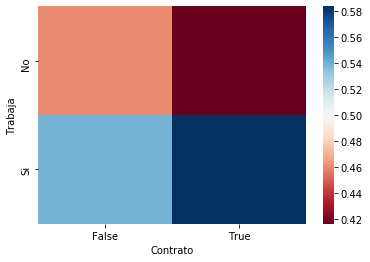

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(tabla_contingencia2, cmap="RdBu")
plt.show()

In [20]:
df.head()

,Experiencia,Trabaja,Cargo,Edad,Promedio,Tiempo_ultimo,Contrato
1,5,Si,Gerencial,28.0,7.897105,1.1,False
2,11,No,Desempleado,30.0,7.202217,9.6,False
3,12,No,Desempleado,24.0,9.687694,2.5,True
4,8,Si,Operativo,31.0,7.273117,7.3,False
5,9,Si,Administrativo,26.0,7.598649,4.4,False


In [21]:
dummies=pd.get_dummies(df.Trabaja, prefix="Trabaja_")
dummies.head()

,Trabaja__No,Trabaja__Si
1,0,1
2,1,0
3,1,0
4,0,1
5,0,1


In [22]:
df_2=pd.concat([df,dummies],axis=1)
df_2

,Experiencia,Trabaja,Cargo,Edad,Promedio,Tiempo_ultimo,Contrato,Trabaja__No,Trabaja__Si
1,5,Si,Gerencial,28.0,7.897105,1.1,False,0,1
2,11,No,Desempleado,30.0,7.202217,9.6,False,1,0
3,12,No,Desempleado,24.0,9.687694,2.5,True,1,0
4,8,Si,Operativo,31.0,7.273117,7.3,False,0,1
5,9,Si,Administrativo,26.0,7.598649,4.4,False,0,1
...,...,...,...,...,...,...,...,...,...
96,9,No,Desempleado,30.0,8.209414,4.0,True,1,0
97,3,Si,Directivo,26.0,7.099113,2.4,False,0,1
98,6,No,Desempleado,27.0,7.066092,0.1,False,1,0
99,8,Si,Operativo,24.0,7.944202,4.6,False,0,1


In [23]:
dummies2=pd.get_dummies(df.Cargo)
dummies2.head()

,Administrativo,Becario,Desempleado,Directivo,Gerencial,Operativo
1,0,0,0,0,1,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,1
5,1,0,0,0,0,0


In [24]:
df_3=pd.concat([df_2,dummies2],axis=1)
df_3

,Experiencia,Trabaja,Cargo,Edad,Promedio,Tiempo_ultimo,Contrato,Trabaja__No,Trabaja__Si,Administrativo,Becario,Desempleado,Directivo,Gerencial,Operativo
1,5,Si,Gerencial,28.0,7.897105,1.1,False,0,1,0,0,0,0,1,0
2,11,No,Desempleado,30.0,7.202217,9.6,False,1,0,0,0,1,0,0,0
3,12,No,Desempleado,24.0,9.687694,2.5,True,1,0,0,0,1,0,0,0
4,8,Si,Operativo,31.0,7.273117,7.3,False,0,1,0,0,0,0,0,1
5,9,Si,Administrativo,26.0,7.598649,4.4,False,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,9,No,Desempleado,30.0,8.209414,4.0,True,1,0,0,0,1,0,0,0
97,3,Si,Directivo,26.0,7.099113,2.4,False,0,1,0,0,0,1,0,0
98,6,No,Desempleado,27.0,7.066092,0.1,False,1,0,0,0,1,0,0,0
99,8,Si,Operativo,24.0,7.944202,4.6,False,0,1,0,0,0,0,0,1


In [25]:
dummies3=pd.get_dummies(df.Contrato, prefix="Contrato_")
dummies3.head()

,Contrato__False,Contrato__True
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0


In [26]:
df_4=pd.concat([df_3,dummies3],axis=1)
df_4

,Experiencia,Trabaja,Cargo,Edad,Promedio,Tiempo_ultimo,Contrato,Trabaja__No,Trabaja__Si,Administrativo,Becario,Desempleado,Directivo,Gerencial,Operativo,Contrato__False,Contrato__True
1,5,Si,Gerencial,28.0,7.897105,1.1,False,0,1,0,0,0,0,1,0,1,0
2,11,No,Desempleado,30.0,7.202217,9.6,False,1,0,0,0,1,0,0,0,1,0
3,12,No,Desempleado,24.0,9.687694,2.5,True,1,0,0,0,1,0,0,0,0,1
4,8,Si,Operativo,31.0,7.273117,7.3,False,0,1,0,0,0,0,0,1,1,0
5,9,Si,Administrativo,26.0,7.598649,4.4,False,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,9,No,Desempleado,30.0,8.209414,4.0,True,1,0,0,0,1,0,0,0,0,1
97,3,Si,Directivo,26.0,7.099113,2.4,False,0,1,0,0,0,1,0,0,1,0
98,6,No,Desempleado,27.0,7.066092,0.1,False,1,0,0,0,1,0,0,0,1,0
99,8,Si,Operativo,24.0,7.944202,4.6,False,0,1,0,0,0,0,0,1,1,0


In [27]:
df_4.columns

Index(['Experiencia', 'Trabaja', 'Cargo', 'Edad', 'Promedio', 'Tiempo_ultimo',
       'Contrato', 'Trabaja__No', 'Trabaja__Si', 'Administrativo', 'Becario',
       'Desempleado', 'Directivo', 'Gerencial', 'Operativo', 'Contrato__False',
       'Contrato__True'],
      dtype='object')

In [28]:
X = df_4[['Experiencia', 'Edad', 'Promedio', 'Tiempo_ultimo',
        'Trabaja__Si', 'Administrativo', 'Becario',
       'Desempleado', 'Directivo', 'Gerencial', 'Operativo']]
y = df_4["Contrato__True"]

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [30]:
# Creamos los grupos de entrenamiento y de prueba.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [31]:
# Creamos el modelo de regresión
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# Realizamos predicciones a partir del set de datos de prueba
y_pred=logistic_regression.predict(X_test)

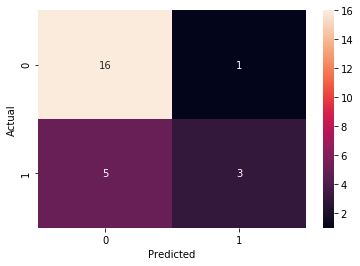

In [33]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [34]:
len(X_test)

25

In [35]:
for pred in y_pred:
    print(pred, end=", ")

0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [36]:
for real in y_test:
    print(real, end=", ")

1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 

In [37]:
y_test

81    1
85    0
34    0
82    0
94    0
18    0
37    0
83    1
70    1
66    0
93    0
40    1
57    0
53    0
52    0
33    0
32    1
45    0
79    1
11    0
3     1
74    0
98    0
63    0
20    1
Name: Contrato__True, dtype: uint8

In [38]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.76


In [40]:
logistic_regression.coef_

array([[ 0.39550379,  0.35538783,  2.42030234, -0.00360959,  0.04267534,
         0.58251566, -0.13852151, -0.0443226 ,  0.20642815,  0.3952392 ,
        -1.00298617]])

In [41]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 
coef=sc.transform(logistic_regression.coef_)

In [42]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test)
coef=pca.transform(coef)
  
explained_variance = pca.explained_variance_ratio_ 

In [43]:
explained_variance

array([0.24247239, 0.17665033])

In [44]:
PCA_1=[]
PCA_2=[]
for n in range(len(X_train)):
    PCA_1.append(X_train[n][0])
    PCA_2.append(X_train[n][1])

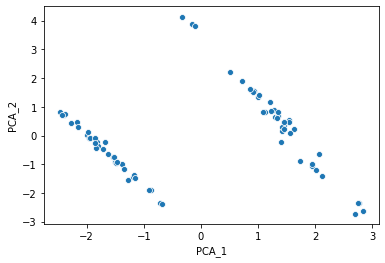

In [45]:
sns.scatterplot(PCA_1,PCA_2)
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()

In [46]:
PCA_1_test=[]
PCA_2_test=[]
for n in range(len(X_test)):
    PCA_1_test.append(X_test[n][0])
    PCA_2_test.append(X_test[n][1])

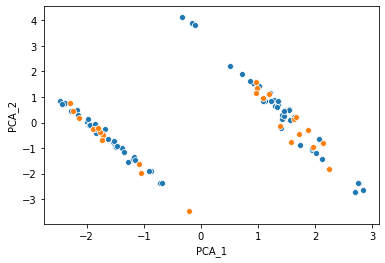

In [49]:
sns.scatterplot(PCA_1,PCA_2)
sns.scatterplot(PCA_1_test,PCA_2_test)
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.show()